In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn')
%matplotlib inline

In [12]:
#Dữ liệu giá cổ phiếu của Facebook và Amazon
stock_data = pd.read_csv('datasets/stock_data.csv', parse_dates=['Date'], index_col='Date').dropna()

#Dữ liệu chỉ số S&P 500
benchmark_data = pd.read_csv('datasets/benchmark_data.csv', parse_dates=['Date'], index_col='Date').dropna()

## 1. Sơ lược về dữ liệu
<p>Xem qua bộ data để biết được có bao nhiêu quan sát và biến<p>

In [13]:
print('--------------Stocks--------------\n')
stock_data.info()
print(stock_data.head(), '\n\n\n')

print('--------------Benchmark--------------\n')
benchmark_data.info()
print(benchmark_data.head())

--------------Stocks--------------

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-01-04 to 2016-12-30
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Amazon    252 non-null    float64
 1   Facebook  252 non-null    float64
dtypes: float64(2)
memory usage: 5.9 KB
                Amazon    Facebook
Date                              
2016-01-04  636.989990  102.220001
2016-01-05  633.789978  102.730003
2016-01-06  632.650024  102.970001
2016-01-07  607.940002   97.919998
2016-01-08  607.049988   97.330002 



--------------Benchmark--------------

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-01-04 to 2016-12-30
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   S&P 500  252 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB
            S&P 500
Date               
2016-01-04  2012.66
2016-01-05  2016.71


## 2. Tóm tắt giá cổ phiếu của Facebook và Amazon, vẽ đồ thị biểu diễn theo ngày.

<p>Trước khi so sánh khoản đầu tư vào Facebook hay Amazon với chỉ số SnP 500, hãy trực quan hóa để hiểu rõ hơn về chúng.

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

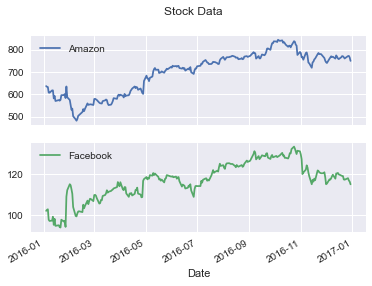

In [14]:
stock_data.plot(title='Stock Data', subplots=True)

stock_data.describe()

## 3. Tóm tắt chỉ số S&P 500, vẽ đồ thị biểu diễn theo ngày.

<p>Lướt qua data về chỉ số SnP 500, chuẩn của chúng ta.

<AxesSubplot:title={'center':'Benchmark Data'}, xlabel='Date'>

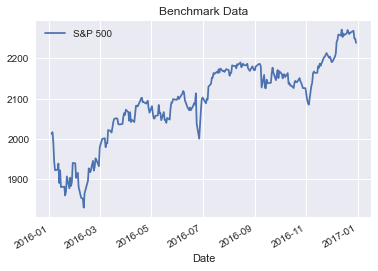

In [15]:
benchmark_data.plot(title='Benchmark Data')

benchmark_data.describe()

## 4. Đầu vào cho Hệ-số Sharpe: bắt đầu với lợi nhuận cổ phiếu trả về hàng ngày

<p>Hệ-số Sharpe sử dụng sự chênh lệch giữa lợi nhuận của hai cơ hội đầu tư đang xét.
    Tuy nhiên, bộ dữ liệu của chúng ta chỉ cho thấy được giá trị của khoản đầu tư trong quá khứ, không phải lợi nhuận. Để tính lợi nhuận, chúng ta cần tính tỉ lệ thay đổi giá trị qua các ngày.

,Amazon,Facebook
count,251.000000,251.000000
mean,0.000818,0.000626
std,0.018383,0.017840
min,-0.076100,-0.058105
25%,-0.007211,-0.007220
50%,0.000857,0.000879
75%,0.009224,0.008108
max,0.095664,0.155214


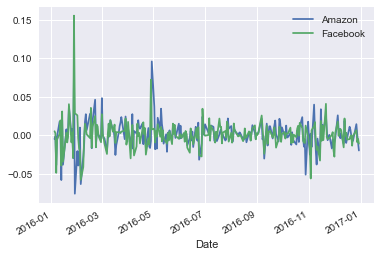

In [20]:
stock_returns = stock_data.pct_change()
stock_returns.plot()
stock_returns.describe()

## 5. Lợi nhuận hằng ngày S&P 500.

<p>Với SnP 500 cũng tương tự, chúng ta tính như bước trước. Tuy nhiên cần lưu ý phải chọn <code>Series</code> thay vì <code>DataFrame</code> để tiện cho các bước tính toán sau.

count    251.000000
mean       0.000458
std        0.008205
min       -0.035920
25%       -0.002949
50%        0.000205
75%        0.004497
max        0.024760
Name: S&P 500, dtype: float64

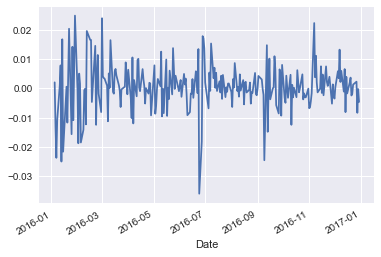

In [21]:
sp_returns = (benchmark_data['S&P 500']).pct_change()
sp_returns.plot()
sp_returns.describe()

## 6. Tính toán lợi nhuận thặng dư của Facebook và Amazon so với S&P 500.
<p>Tiếp theo chúng ta cần tính hiệu suất tương đối của cổ phiếu Facebook và Amazon so với chuẩn SnP 500. Bằng cách tính sự chênh lệch của <code>stock_returns</code> và <code>sp_returns</code> mỗi ngày.

,Amazon,Facebook
count,251.000000,251.000000
mean,0.000360,0.000168
std,0.016126,0.015439
min,-0.100860,-0.051958
25%,-0.006229,-0.005663
50%,0.000698,-0.000454
75%,0.007351,0.005814
max,0.100728,0.149686


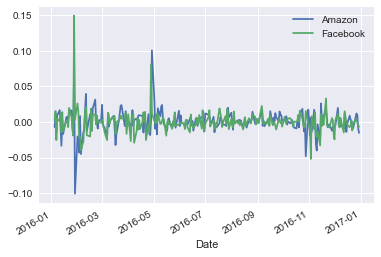

In [22]:
excess_returns = stock_returns.sub(sp_returns, axis=0)
excess_returns.plot()
excess_returns.describe()

## 7. Hệ-số Sharpe, Bước 1: Chênh lệch trung bình "Lợi nhuận cổ phiếu hàng ngày" so với S&P 500.

<p>Bây giờ chúng ta bắt đầu tính Hệ-số Sharpe. Đầu tiên ta cần phải tính trung bình của <code>excess_return</code> (lợi nhuận thặng dư). Cái này sẽ cho chúng ta biết lợi nhuận thặng dư theo ngày lớn hơn hay nhỏ hơn bao nhiêu so với chuẩn.

In [ ]:
avg_excess_return = excess_returns.mean()
avg_excess_return.plot.bar(title='Mean of the Return Difference')

## 8. Hệ-số Sharpe, Bước 2: Độ lệch chuẩn chênh lệch lợi nhuận

<p>Có vẻ như có một chút khác biệt giữa lợi nhuận trung bình hàng ngày của Facebook và Amazon
    Tiếp theo chúng ta tính độ lệch chuẩn của <code>excess_returns</code> (lợi nhuận thặng dư). Điều này cho chúng ta thấy mức độ rủi ro khi đầu tư vào cổ phiếu so với đầu tư vào SnP 500.

<AxesSubplot:title={'center':'Standard Deviation of the Return Difference'}>

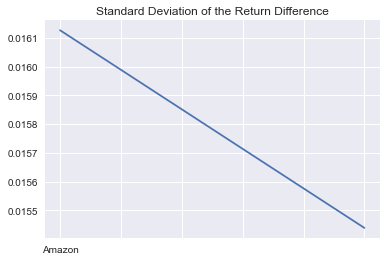

In [24]:
sd_excess_return = excess_returns.std()
sd_excess_return.plot(title='Standard Deviation of the Return Difference')

## 9. Tổng hợp lại

<p>Bây giờ chúng ta cần tính tỷ lệ của <code>avg_excess_returns</code> (lợi nhuận thặng dư trung bình) và <code>sd_excess_returns</code> (độ lệch chuẩn lợi nhuận thặng dư trung bình). Kết quả cuối cùng là Hệ-số Sharpe và cho biết cơ hội đầu tư có lợi nhuận trên một đơn vị rủi ro nhiều hơn (hoặc ít hơn) bao nhiêu.
    
Tỷ lệ Sharpe thường được tính theo năm bằng cách nhân nó với căn bậc hai của số chu kỳ. Chúng ta đã sử dụng dữ liệu hàng ngày làm đầu vào, vì vậy chúng ta sẽ sử dụng căn bậc hai của số ngày giao dịch (5 ngày/tuần, 52 tuần/năm, trừ đi một vài ngày nghỉ): √252

<AxesSubplot:title={'center':'Annualized Sharpe Ratio: Stocks vs S&P 500'}>

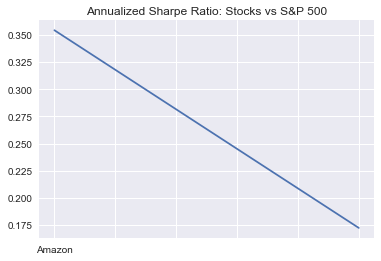

In [25]:
daily_sharpe_ratio = avg_excess_return.div(sd_excess_return)
annual_factor = np.sqrt(252)
annual_sharpe_ratio = daily_sharpe_ratio.mul(annual_factor)
annual_sharpe_ratio.plot(title='Annualized Sharpe Ratio: Stocks vs S&P 500')

## 10. Kết luận

<p>Với hai hệ số Sharpe vừa tính được, có thể thấy hệ số Sharpe của Amazon cao gấp đôi Facebook, có nghĩa là khoản đầu tư với Amazon sẽ đem lại lợi nhuận nhiều gấp đôi SnP 500 cho mỗi đơn vị rủi ro xác định.
    
Có được điều này, chủ yếu bởi sự khác biệt giữa lợi nhuận của Amazon so với Facebook hơn là rủi ro. Vì độ lệch chuẩn giữa hai mã chỉ khác nhau có một chút xíu.

Khi đối mặt với các lựa chọn đầu tư khi mà cả hai đều khác nhau về lợi nhuận và mức độ rủi ro, thì hệ số Sharpe giúp nhà đầu tư so sánh các cơ hội đầu tư trên cơ sở bình đẳng.

In [27]:
buy_amazon = True
if buy_amazon == True:
    print('Hãy mua cổ phiếu của Amazon!')
else:
    print('...')

Hãy mua cổ phiếu của Amazon!
